In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import math

In [ ]:
class Autoencoder():
  def __init__(self,learning_rate = 0.01,
               hidden_neurons = 32,
               activation = 'relu',
               loss = 'mean_squared_error',
               epochs = 10,
               batch_size = 512,
               momentum = 0.9,
               verbose = 1,
               optimizer = 'adam'):
    
    self.epochs = epochs
    self.batch_size = batch_size
    self.optimizer = optimizer
    self.learning_rate = learning_rate
    self.hidden_neurons = hidden_neurons
    self.activation = activation
    self.loss = loss
    self.verbose = verbose
    self.layer_name = "bottleneck"
    self.autoencoder = None
    self.momentum = momentum

  def get_optimizer(self):
    if self.optimizer.lower() == 'adam':
      opt = keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer.lower().startswith('rms'):
      opt = keras.optimizers.RMSprop(learning_rate=self.learning_rate)
    elif self.optimizer.lower() == 'SGD_momentum':
      opt = keras.optimizers.SGD(learning_rate=self.learning_rate, momentum=self.momentum)
    else:
      opt = keras.optimizers.SGD(learning_rate=self.learning_rate)

    return opt

  def fit_autoencoder(self,train,test):

    input_shape = train.shape[1]
    opt = self.get_optimizer()

    autoencoder = Sequential()
    autoencoder.add(Dense(512,  activation=self.activation, input_shape=(input_shape,)))
    autoencoder.add(Dense(128,  activation=self.activation))
    autoencoder.add(Dense(64,   activation=self.activation))

    autoencoder.add(Dense(self.hidden_neurons, activation=self.activation, name=self.layer_name))

    autoencoder.add(Dense(64,   activation=self.activation))
    autoencoder.add(Dense(128,  activation=self.activation))
    autoencoder.add(Dense(512,  activation=self.activation))
    autoencoder.add(Dense(784,  activation=self.activation))

    autoencoder.compile(loss=self.loss, optimizer = opt)
    trained_model = autoencoder.fit(train, train, batch_size=self.batch_size,
                                    epochs=self.epochs, verbose=self.verbose, validation_data=(test, test))
    
    self.autoencoder = autoencoder
    return trained_model

  def get_encoded_data(self,data):
    encoder = Model(self.autoencoder.input, self.autoencoder.get_layer(self.layer_name).output)
    encoded_data = encoder.predict(data) 
    return encoded_data
  
  def get_decoded_data(self,encoded_data):
    no_of_layers = int(len(self.autoencoder.layers)//2)
    
    encoded_input = Input(shape=(self.hidden_neurons,))
    decoder = self.autoencoder.layers[-no_of_layers](encoded_input)

    for i in range(1,no_of_layers):  
      decoder = self.autoencoder.layers[i-no_of_layers](decoder)

    decoder = Model(encoded_input, decoder)
    return decoder.predict(encoded_data)

  def predict(self,data):
    encoded_data = self.get_encoded_data(data)
    return get_decoded_data(encoded_data)



In [ ]:
def plot_images(original, predicted, n):
  
  plt.figure(figsize=(20,4))

  for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(original[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n , i+1+n)
    plt.imshow(predicted[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

In [ ]:
def plot_neurons_vs_loss(optimizer):
  hidden_neurons = [16,32,48,64]
  reconstruction_loss_adam = []
  for h in hidden_neurons:
    model = Autoencoder(hidden_neurons=h,optimizer = optimizer,verbose=0)
    trained_model = model.fit_autoencoder(train_x,val_x)
    reconstruction_loss_adam.append(trained_model.history['loss'][-1])
  plt.plot(hidden_neurons,reconstruction_loss_adam)
  plt.show()


In [ ]:
## loading the data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

X = np.concatenate((x_train,x_test))
y = np.concatenate((y_train, y_test))


from sklearn.model_selection import train_test_split
train_x, val_x, train_y, testY = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
train_x.shape

(49000, 784)

## Using Adam optimizer 

In [ ]:
## training the model 

model_adam = Autoencoder()
trained_model_adam = model_adam.fit_autoencoder(train_x,val_x)
encoded_data_adam = model_adam.get_encoded_data(val_x)
reconstructed_data_adam = model_adam.get_decoded_data(encoded_data_adam) 

Epoch 1/10
96/96 [==============================] - 7s 65ms/step - loss: 0.9907 - val_loss: 0.0571
Epoch 2/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0532 - val_loss: 0.0423
Epoch 3/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0410 - val_loss: 0.0379
Epoch 4/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0369 - val_loss: 0.0343
Epoch 5/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0340 - val_loss: 0.0326
Epoch 6/10
96/96 [==============================] - 6s 63ms/step - loss: 0.0318 - val_loss: 0.0304
Epoch 7/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0303 - val_loss: 0.0297
Epoch 8/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0292 - val_loss: 0.0283
Epoch 9/10
96/96 [==============================] - 6s 62ms/step - loss: 0.0280 - val_loss: 0.0272
Epoch 10/10
96/96 [==============================] - 6s 63ms/step - loss: 0.0269 - val_loss: 0.0273


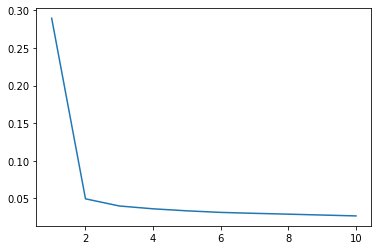

In [ ]:
epochs = [1,2,3,4,5,6,7,8,9,10]
loss_adam = trained_model_adam.history['loss']
plt.plot(epochs,loss_adam)
plt.show()

In [ ]:
print("Test recosntruction loss: ",trained_model_adam.history['val_loss'][-1])

Test recosntruction loss:  0.02726498246192932


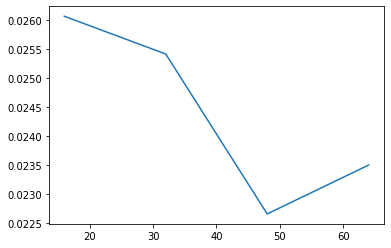

In [ ]:
plot_neurons_vs_loss("adam")

## Using RMSProp optimizer

In [ ]:
## training the model 

model_rms = Autoencoder(optimizer = 'rms')
trained_model_rms = model_rms.fit_autoencoder(train_x,val_x)
encoded_data_rms = model_rms.get_encoded_data(val_x)
reconstructed_data_rms = model_rms.get_decoded_data(encoded_data_rms) 

Epoch 1/10
96/96 [==============================] - 7s 69ms/step - loss: 305520.0690 - val_loss: 0.0716
Epoch 2/10
96/96 [==============================] - 6s 65ms/step - loss: 0.0683 - val_loss: 0.0585
Epoch 3/10
96/96 [==============================] - 6s 65ms/step - loss: 0.0550 - val_loss: 0.0575
Epoch 4/10
96/96 [==============================] - 6s 65ms/step - loss: 0.0557 - val_loss: 0.0474
Epoch 5/10
96/96 [==============================] - 6s 64ms/step - loss: 0.0484 - val_loss: 0.0440
Epoch 6/10
96/96 [==============================] - 6s 65ms/step - loss: 0.0416 - val_loss: 0.0384
Epoch 7/10
96/96 [==============================] - 6s 64ms/step - loss: 0.0377 - val_loss: 0.0364
Epoch 8/10
96/96 [==============================] - 6s 64ms/step - loss: 0.0357 - val_loss: 0.0359
Epoch 9/10
96/96 [==============================] - 6s 64ms/step - loss: 0.0343 - val_loss: 0.0344
Epoch 10/10
96/96 [==============================] - 6s 64ms/step - loss: 0.0332 - val_loss: 0.0347


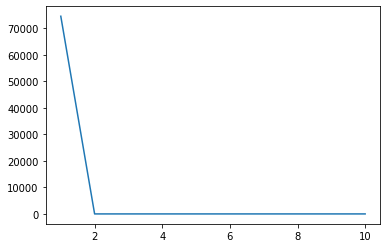

In [ ]:
loss_rms = trained_model_rms.history['loss']
plt.plot(epochs,loss_rms)
plt.show()

In [ ]:
print("Test recosntruction loss: ",trained_model_rms.history['val_loss'][-1])

Test recosntruction loss:  0.034688808023929596


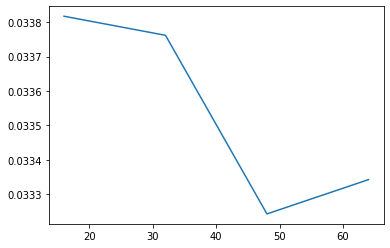

In [ ]:
plot_neurons_vs_loss("rms")

## Using SGD without momentum

In [ ]:
## training the model 

model_sgd = Autoencoder(optimizer = 'SGD',batch_size = 32)
trained_model_sgd = model_sgd.fit_autoencoder(train_x,val_x)
encoded_data_sgd = model_sgd.get_encoded_data(val_x)
reconstructed_data_sgd = model_sgd.get_decoded_data(encoded_data_sgd) 

Epoch 1/10
1532/1532 [==============================] - 16s 10ms/step - loss: 0.1077 - val_loss: 0.0971
Epoch 2/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0937 - val_loss: 0.0860
Epoch 3/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0854 - val_loss: 0.0830
Epoch 4/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0831 - val_loss: 0.0822
Epoch 5/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0825 - val_loss: 0.0818
Epoch 6/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0820 - val_loss: 0.0816
Epoch 7/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0819 - val_loss: 0.0816
Epoch 8/10
1532/1532 [==============================] - 16s 10ms/step - loss: 0.0819 - val_loss: 0.0815
Epoch 9/10
1532/1532 [==============================] - 16s 10ms/step - loss: 0.0817 - val_loss: 0.0814
Epoch 10/10
1532/1532 [==============================] - 15s 10m

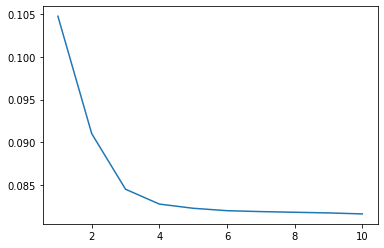

In [ ]:
loss_sgd = trained_model_sgd.history['loss']
plt.plot(epochs,loss_sgd)
plt.show()

In [ ]:
print("Test recosntruction loss: ",trained_model_sgd.history['val_loss'][-1])

Test recosntruction loss:  0.08123354613780975


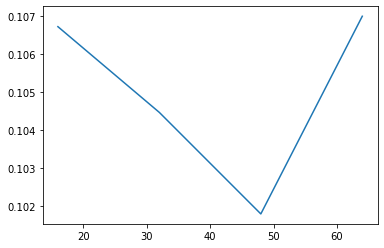

In [ ]:
plot_neurons_vs_loss("SGD")

## Using SGD with momentum

In [ ]:
## training the model 

model_sgd_momentum = Autoencoder(optimizer = 'SGD_momentum',batch_size = 32)
trained_model_sgd_momentum= model_sgd_momentum.fit_autoencoder(train_x,val_x)
encoded_data_sgd_momentum = model_sgd_momentum.get_encoded_data(val_x)
reconstructed_data_sgd_momentum = model_sgd_momentum.get_decoded_data(encoded_data_sgd_momentum) 

Epoch 1/10
1532/1532 [==============================] - 16s 10ms/step - loss: 0.1093 - val_loss: 0.1010
Epoch 2/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0969 - val_loss: 0.0856
Epoch 3/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0842 - val_loss: 0.0811
Epoch 4/10
1532/1532 [==============================] - 14s 9ms/step - loss: 0.0812 - val_loss: 0.0800
Epoch 5/10
1532/1532 [==============================] - 15s 10ms/step - loss: 0.0802 - val_loss: 0.0798
Epoch 6/10
1532/1532 [==============================] - 15s 9ms/step - loss: 0.0800 - val_loss: 0.0797
Epoch 7/10
1532/1532 [==============================] - 14s 9ms/step - loss: 0.0801 - val_loss: 0.0796
Epoch 8/10
1532/1532 [==============================] - 14s 9ms/step - loss: 0.0798 - val_loss: 0.0796
Epoch 9/10
1532/1532 [==============================] - 14s 9ms/step - loss: 0.0798 - val_loss: 0.0795
Epoch 10/10
1532/1532 [==============================] - 15s 10ms/ste

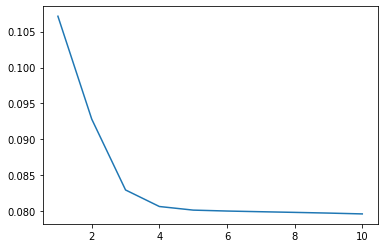

In [ ]:
loss_sgd_momentum = trained_model_sgd_momentum.history['loss']
plt.plot(epochs,loss_sgd_momentum)
plt.show()

In [ ]:
print("Test recosntruction loss: ",trained_model_sgd_momentum.history['val_loss'][-1])

Test recosntruction loss:  0.07932601124048233


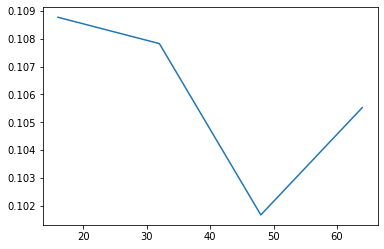

In [ ]:
plot_neurons_vs_loss("SGD_momentum")

## Saving the best model

- Adam optimizer gave less loss
- So, choosing that as the best model

In [ ]:
## Save the model
model_adam.autoencoder.save("/content/drive/MyDrive/SMAI_Assignment3/q2.h5")

In [ ]:
## Import the trained model
saved_model = keras.models.load_model("/content/drive/MyDrive/SMAI_Assignment3/q2.h5")

In [ ]:
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
bottleneck (Dense)           (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 512)              

In [ ]:
## get predicted values
target_data = saved_model.predict(val_x)

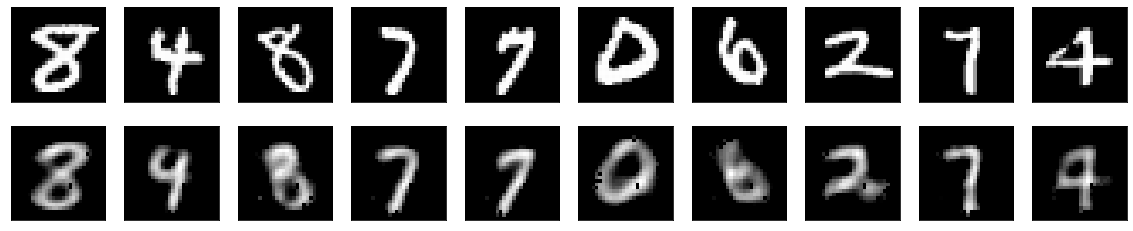

In [ ]:
plot_images(val_x, target_data, 10)

## PCA Reconstruction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
pca = PCA(.95) 

In [ ]:
lower_dimensional_data = pca.fit_transform(val_x)
approximation = pca.inverse_transform(lower_dimensional_data) 

In [ ]:
PCA_loss = mean_squared_error(approximation,val_x)

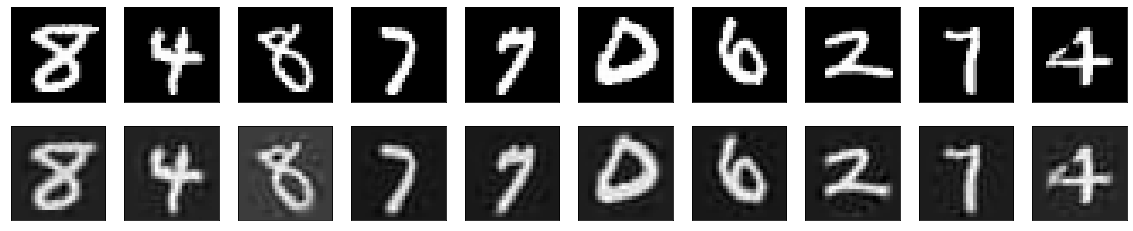

In [ ]:
plot_images(val_x, approximation, 10) 

## Comparing PCA and Autoencoder

In [ ]:
print("Test reconstruction loss of PCA: ", PCA_loss)
print("Test recosntruction loss of autoencoder: ", trained_model_adam.history['val_loss'][-1])

Test reconstruction loss of PCA:  0.0033465929650715103
Test recosntruction loss of autoencoder:  0.02726498246192932
